$$L_i(x) = \prod_{j=0, j\neq i}^{n-1} \frac{x-x_j}{x_i-x_j}$$


In [69]:
def lagrange(given):
    lagrange = []
    # Lagrange
    for i in range(len(given)):
        num = []
        denom=1
        for j in range(len(given)):
            if i != j:
                nume = f'(x - {given[j][0]})'
                num.append(nume)
                denom *= (given[i][0] - given[j][0])
            else: 
                continue
        
        numerator = "*".join(num)

        term = f'({numerator})*{given[i][1]} / {round(denom, 4)}'
        lagrange.append(term)



    final_eq = " + ".join(lagrange)
    return final_eq

def eval_func(func, x):
    return eval(func.replace("x", f"{x}"))
    

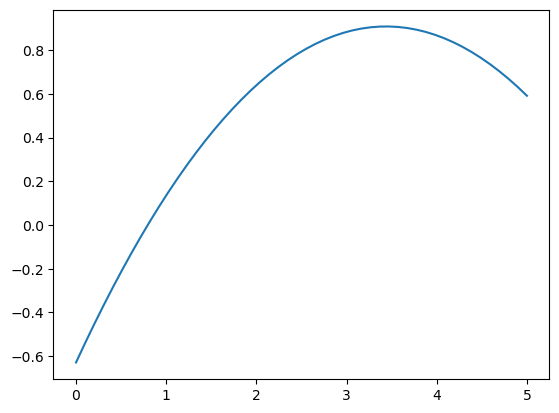

In [65]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 5)
Y = [eval_func(final_eq, x) for x in X]

plt.plot(X, Y)


In [71]:
print(given)

[(0, 1), (1, 1.5), (2, 2.3), (3, 3.5), (4, 4.2), (5, 4.0), (6, 4.5), (7, 5.2), (8, 6.8), (9, 8.5), (10, 9.8)]


In [ ]:
import numpy as np
from scipy.interpolate import PchipInterpolator
from datetime import datetime, timedelta

# Original data points
data_points = [
    (0, 1),     # Starting point
    (1, 1.2),   # Longer initial period (slow start)
    (2, 1.5),   # Continued slow growth
    (3, 2.0),   # Beginning of initial motivation
    (4, 3.2),   # Peak of initial motivation
    (5, 3.4),   # Slight plateau after motivation
    (6, 2.8),   # Beginning of steeper dip
    (7, 2.2),   # Deepest point of dip (significantly lower)
    (8, 2.3),   # Early recovery from dip
    (9, 2.9),   # Continued gradual recovery
    (10, 3.5),  # Further recovery before upward trend
    (11, 4.5),  # Acceleration in upward trend
    (12, 5.4),  # Continued upward growth
    (13, 6.5),  # Steeper section of upward trend
    (14, 7.8),  # Continued upward growth
    (15, 9.0),  # Near final point
    (16, 9.3),  # Approaching plateau
    (17, 9.6),  # Continued slow growth
    (18, 9.9)   # Final point
]

x = [point[0] for point in data_points]
y = [point[1] for point in data_points]

# Normalize both axes to [0,1]
x_norm = [(point - min(x))/(max(x) - min(x)) for point in x]
y_norm = [(point - min(y))/(max(y) - min(y)) for point in y]

# Create normalized interpolator
skill_model = PchipInterpolator(x_norm, y_norm)

# Function to apply the same pattern to any timeframe and skill range
def skill_acquisition_curve(time_points, start_time, end_time, start_level, end_level):
    """
    Apply the universal skill acquisition model to any timeframe and skill range
    
    Parameters:
    time_points: array-like - The specific times to evaluate
    start_time: The beginning of the learning period
    end_time: The end of the learning period
    start_level: Initial skill level
    end_level: Final target skill level
    
    Returns:
    skill_levels: Predicted skill levels at given time points
    """
    # Normalize input times to [0,1] range
    time_norm = [(t - start_time)/(end_time - start_time) for t in time_points]
    
    # Apply model (and clip to ensure we stay in [0,1] range)
    skill_norm = np.clip(skill_model(time_norm), 0, 1)
    
    # Scale to target skill range
    skill_levels = skill_norm * (end_level - start_level) + start_level
    
    return skill_levels

# Example usage:
# Skill 1: Learn Python in 30 days (scale 0-100)
start_date1 = datetime(2023, 1, 1)
end_date1 = datetime(2023, 1, 31)
dates1 = [start_date1 + timedelta(days=i) for i in range(31)]
python_skill = skill_acquisition_curve(dates1, start_date1, end_date1, 0, 100)

# Skill 2: Learn piano in 6 months (scale 1-10)
start_date2 = datetime(2023, 1, 1)
end_date2 = datetime(2023, 7, 1)
dates2 = [start_date2 + timedelta(days=i*5) for i in range(37)]  # Sample every 5 days
piano_skill = skill_acquisition_curve(dates2, start_date2, end_date2, 1, 10)

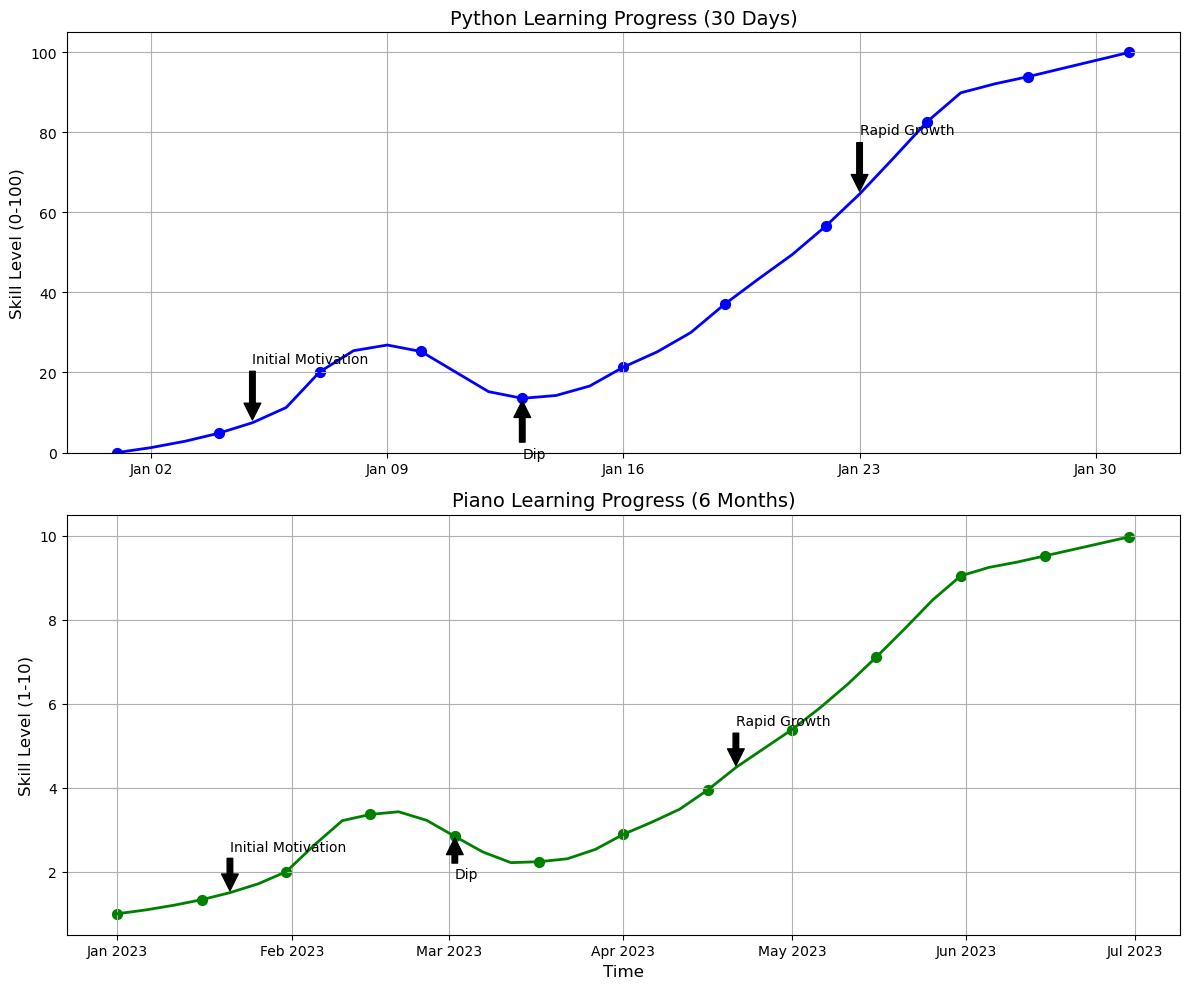

In [101]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Prepare dates for plotting
# Skill 1: Learn Python in 30 days (scale 0-100)
start_date1 = datetime(2023, 1, 1)
end_date1 = datetime(2023, 1, 31)
dates1 = [start_date1 + timedelta(days=i) for i in range(31)]
python_skill = skill_acquisition_curve(dates1, start_date1, end_date1, 0, 100)

# Skill 2: Learn piano in 6 months (scale 1-10)
start_date2 = datetime(2023, 1, 1)
end_date2 = datetime(2023, 7, 1)
dates2 = [start_date2 + timedelta(days=i*5) for i in range(37)]  # Sample every 5 days
piano_skill = skill_acquisition_curve(dates2, start_date2, end_date2, 1, 10)

# Plot Python skill progress
ax1.plot(dates1, python_skill, 'b-', linewidth=2)
ax1.scatter(dates1[::3], python_skill[::3], color='blue', s=50)  # Plot every 3rd point
ax1.set_title('Python Learning Progress (30 Days)', fontsize=14)
ax1.set_ylabel('Skill Level (0-100)', fontsize=12)
ax1.set_ylim(0, 105)
ax1.grid(True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0))  # Every Monday

# Annotate key phases for Python
ax1.annotate('Initial Motivation', xy=(dates1[4], python_skill[4]), 
             xytext=(dates1[4], python_skill[4]+15),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('Dip', xy=(dates1[12], python_skill[12]), 
             xytext=(dates1[12], python_skill[12]-15),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('Rapid Growth', xy=(dates1[22], python_skill[22]), 
             xytext=(dates1[22], python_skill[22]+15),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Plot Piano skill progress
ax2.plot(dates2, piano_skill, 'g-', linewidth=2)
ax2.scatter(dates2[::3], piano_skill[::3], color='green', s=50)  # Plot every 3rd point
ax2.set_title('Piano Learning Progress (6 Months)', fontsize=14)
ax2.set_xlabel('Time', fontsize=12)
ax2.set_ylabel('Skill Level (1-10)', fontsize=12)
ax2.set_ylim(0.5, 10.5)
ax2.grid(True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())

ax2.annotate('Initial Motivation', xy=(dates2[4], piano_skill[4]), 
             xytext=(dates2[4], piano_skill[4]+1),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate('Dip', xy=(dates2[12], piano_skill[12]), 
             xytext=(dates2[12], piano_skill[12]-1),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate('Rapid Growth', xy=(dates2[22], piano_skill[22]), 
             xytext=(dates2[22], piano_skill[22]+1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
# plt.show()

# Optional: To save the figure
plt.savefig('skill_acquisition_model.png', dpi=300, bbox_inches='tight')